In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

In [8]:
#Different 10 Year Rates
yields = []
for i in range(5, 505, 5):
    yields.append(i/10000)

In [14]:
class duration:
    def __init__(self, current_yield):
        self.current_yield =  current_yield
        fv = 1000
        c = .05
        price = 1020
        n = 5
        period = 2
        ytm = ((fv*c)+((fv-price)/n))/((fv+price)/2)

        years=[]
        for x in range(1, n+1):
            for y in range(0, period):
                years.append(x)

        periods = []
        for i in range(1, (n*period)+1):
            periods.append(i)

        cash_flow = []
        for i in range(1, len(periods)):
            cash_flow.append((fv*c)/period)
        cash_flow.append((fv*c)/period+fv)

        df= pd.DataFrame(list(zip(years, periods, cash_flow)), columns=['Year', 'Payment Period', 'Cashflows'])

        df['PV of CF'] = df['Cashflows'].div((1+(self.current_yield/period))**df['Payment Period'])
        pv_all = df['PV of CF'].sum()
        df['Duration of each cashflow'] =  df['Cashflows'].div((1+(ytm/period))**df['Payment Period'])*(df['Year']/pv_all)
        self.duration = df['Duration of each cashflow'].sum()
        self.df = df

In [15]:
#Run Class for Each Yield
for i in range(len(yields)):
    globals()['y{}'.format(i)]= duration(yields[i])

In [16]:
y20.df

,Year,Payment Period,Cashflows,PV of CF,Duration of each cashflow
0,1,1,25.0,24.869435,0.020508
1,1,2,25.0,24.739553,0.020051
2,2,3,25.0,24.610348,0.039209
3,2,4,25.0,24.481819,0.038336
4,3,5,25.0,24.353961,0.056224
5,3,6,25.0,24.226770,0.054972
6,4,7,25.0,24.100244,0.071664
7,4,8,25.0,23.974378,0.070069
8,5,9,25.0,23.849170,0.085636
9,5,10,1025.0,972.709254,3.432884


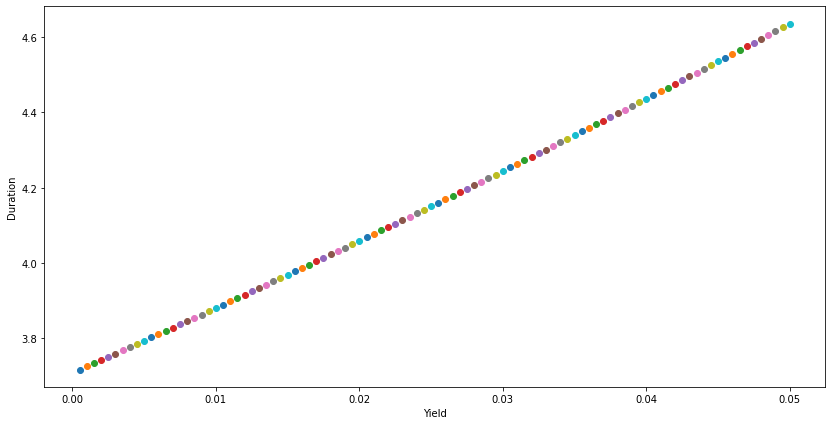

In [18]:
#Graph Durations
fig, (ax1) = plt.subplots(figsize=(14,7))

ax1.set_ylabel('Duration')
ax1.set_xlabel('Yield')
for i in range(len(yields)):
    ax1.scatter(yields[i], globals()['y{}'.format(i)].duration)